<a href="https://colab.research.google.com/github/Roger90Br/customer-transactions-clustering/blob/main/Desafio_7_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Introdução***

Este notebook apresenta uma análise de dados de transações para identificar padrões de comportamento dos clientes. O processo segue as etapas abaixo:

Preparação dos Dados: Inicia com o carregamento dos dados e inclui a normalização das variáveis. Também foram tratados valores nulos e inconsistências para garantir a qualidade dos dados.

Exploração dos Dados: Realizamos uma análise inicial para compreender a distribuição e as características principais das variáveis envolvidas.

Clusterização: Aplicamos o algoritmo K-Means para segmentar os clientes em clusters com base em duas variáveis principais: Quantidade e Preço Unitário. A escolha do número ideal de clusters foi feita usando o Método do Elbow e o Silhouette Score.

Visualização: Criamos gráficos para visualizar a distribuição dos clusters e entender melhor os grupos formados.

Este trabalho visa oferecer uma visão detalhada sobre o comportamento dos clientes, permitindo a identificação de segmentos distintos e a análise dos padrões de compra. As visualizações ajudam a interpretar os resultados e a formular estratégias de marketing e vendas mais eficazes.

**Análise exploratória dos dados**

In [ ]:
from google.colab import drive
import pandas as pd

# Conectar ao Google Drive
drive.mount('/content/drive')

# Tentar carregar o arquivo CSV com a codificação correta
file_path = '/content/drive/MyDrive/data.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Arquivo carregado com sucesso!")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

# Tentar converter a coluna InvoiceDate para datetime com diferentes formatos
try:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    print("Datas convertidas com sucesso!")
except Exception as e:
    print(f"Ocorreu um erro ao converter as datas: {e}")

# Verificar dados nulos após a conversão
print(df.isnull().sum())

# Tratar dados nulos - aqui vamos remover linhas com dados nulos
df = df.dropna()

# Verificar novamente se há dados nulos
print(df.isnull().sum())

# Converter as colunas de identificação para string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)

# Verificar o dataframe final
print(df.head())
print(df.dtypes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo carregado com sucesso!
Datas convertidas com sucesso!
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice Custo

**Pré-processamento dos dados**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supomos que o DataFrame `df` já está carregado e pré-processado

# 1. Selecionar as variáveis mais relevantes
df_relevant = df[['Quantity', 'UnitPrice']]

# 2. Remover dados nulos
df_relevant = df_relevant.dropna()

# 3. Remover dados duplicados
df_relevant = df_relevant.drop_duplicates()

# 4. Remover outliers usando o método do Intervalo Interquartil (IQR)
Q1 = df_relevant.quantile(0.25)
Q3 = df_relevant.quantile(0.75)
IQR = Q3 - Q1

# Filtrar os dados para remover outliers
df_relevant = df_relevant[~((df_relevant < (Q1 - 1.5 * IQR)) | (df_relevant > (Q3 + 1.5 * IQR))).any(axis=1)]

# 5. Verificar e remover dados inconsistentes
df_relevant = df_relevant[(df_relevant['Quantity'] >= 0) & (df_relevant['UnitPrice'] >= 0)]

# 6. Normalizar os dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_relevant)

# Convertendo o array numpy de volta para DataFrame para possíveis usos futuros
df_normalized = pd.DataFrame(df_normalized, columns=['Quantity', 'UnitPrice'])

# Exibir o DataFrame resultante e estatísticas
print(df_normalized.head())
print(df_normalized.describe())


   Quantity  UnitPrice
0 -0.692311  -1.100324
1 -0.480961   1.988902
2 -0.718730  -0.885795
3 -0.375285  -0.585453
4 -0.269610  -0.585453
           Quantity     UnitPrice
count  5.750000e+02  5.750000e+02
mean   1.359299e-16 -5.251838e-17
std    1.000871e+00  1.000871e+00
min   -9.829183e-01 -1.177555e+00
25%   -7.979865e-01 -8.857947e-01
50%   -3.752852e-01 -2.250434e-01
75%    4.569079e-01  5.730068e-01
max    3.112000e+00  2.761209e+00


**Selecione um algoritmo de clusterização**

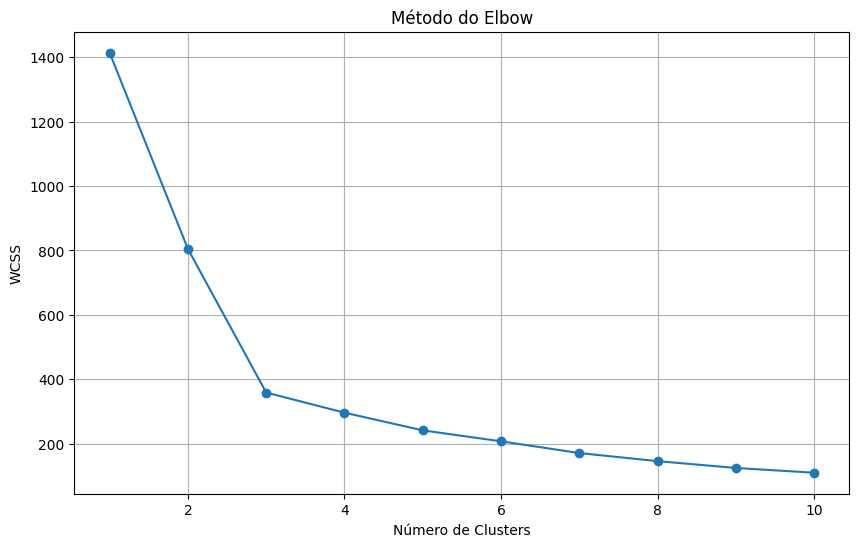

Número de Clusters: 2, Silhouette Score: 0.5015440689694874
Número de Clusters: 3, Silhouette Score: 0.5633590293581517
Número de Clusters: 4, Silhouette Score: 0.5119755427932907
Número de Clusters: 5, Silhouette Score: 0.44095310810205024
Número de Clusters: 6, Silhouette Score: 0.439176346160977
Número de Clusters: 7, Silhouette Score: 0.4327762751275337
Número de Clusters: 8, Silhouette Score: 0.44348517191829695
Número de Clusters: 9, Silhouette Score: 0.4329124775087733
Número de Clusters: 10, Silhouette Score: 0.444756878647174
O número ideal de clusters é 3


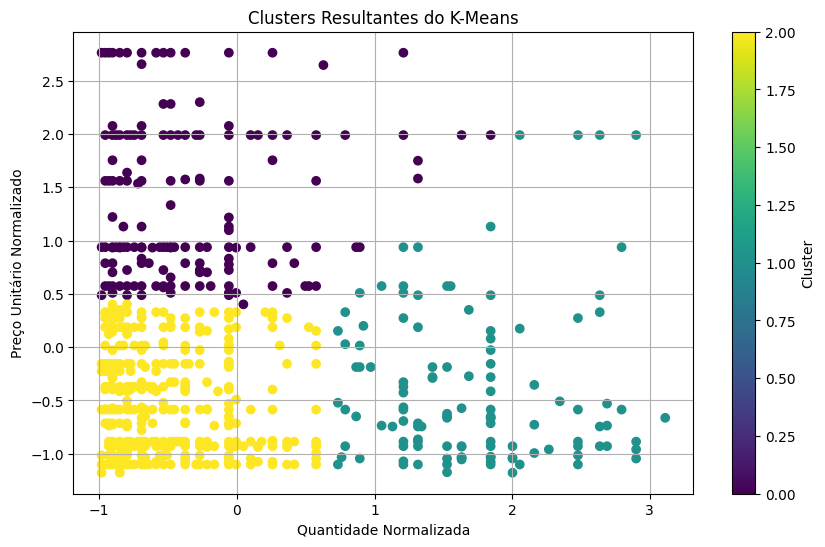

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supomos que o DataFrame df_normalized já está carregado e preparado

# 1. Método do Elbow para Encontrar o Número Ideal de Clusters
def plot_elbow_method(data):
    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):  # Testando de 1 a 10 clusters
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Método do Elbow')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

plot_elbow_method(df_normalized)

# 2. Método Silhouette Score para Confirmar a Quantidade de Clusters
def find_best_k(data):
    best_k = 0
    best_score = -1
    for k in range(2, 11):  # Testando de 2 a 10 clusters
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        print(f'Número de Clusters: {k}, Silhouette Score: {score}')
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

best_k = find_best_k(df_normalized)
print(f'O número ideal de clusters é {best_k}')

# 3. Implementar o K-Means com o Número Ideal de Clusters
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=0)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

# 4. Visualizar os Resultados
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized['Quantity'], df_normalized['UnitPrice'], c=df_normalized['Cluster'], cmap='viridis')
plt.title('Clusters Resultantes do K-Means')
plt.xlabel('Quantidade Normalizada')
plt.ylabel('Preço Unitário Normalizado')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



**Analise os clusters obtidos**

Estatísticas Descritivas dos Clusters:
  Cluster  Quantity                     UnitPrice                    
               mean    median       std      mean    median       std
0       0 -0.342661 -0.480961  0.586757  1.348107  0.937707  0.723359
1       1  1.697351  1.632546  0.608252 -0.394320 -0.649812  0.727088
2       2 -0.477455 -0.586636  0.426845 -0.500752 -0.585453  0.475944


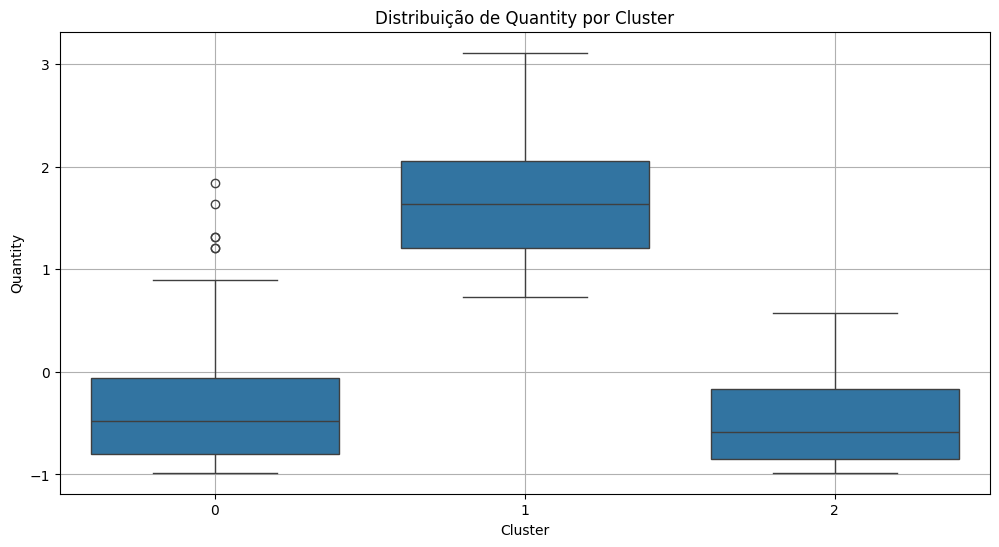

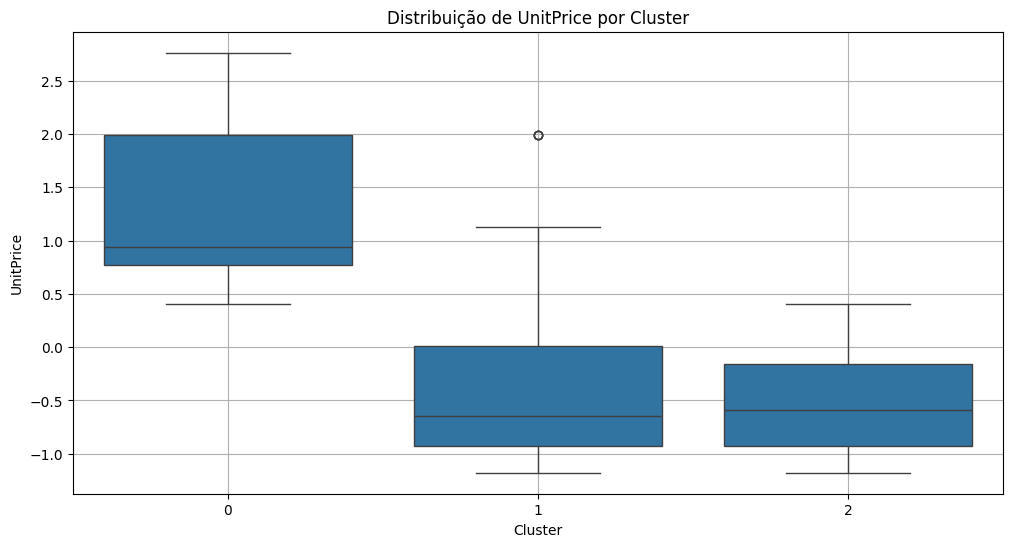

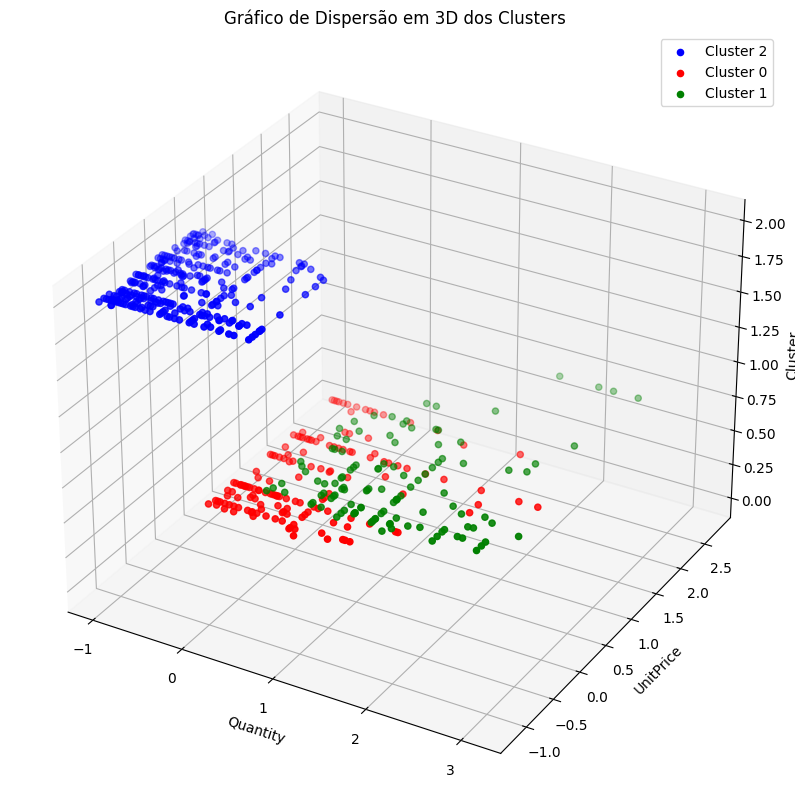

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Supomos que df_normalized já tem a coluna 'Cluster' após a aplicação do K-Means

# 1. Estatísticas Descritivas dos Clusters
cluster_stats = df_normalized.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std']
}).reset_index()

print("Estatísticas Descritivas dos Clusters:")
print(cluster_stats)

# 2. Gráficos de Distribuição dos Clusters
def plot_distribution(data, column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'Distribuição de {column} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

plot_distribution(df_normalized, 'Quantity')
plot_distribution(df_normalized, 'UnitPrice')

# 3. Gráfico de Dispersão em 3D com Cores Distintas para Cada Cluster
def plot_3d_scatter(data):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Definindo cores distintas para cada cluster
    colors = ['r', 'g', 'b']

    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        ax.scatter(
            cluster_data['Quantity'],
            cluster_data['UnitPrice'],
            cluster_data['Cluster'],
            color=colors[cluster],
            label=f'Cluster {cluster}'
        )

    ax.set_xlabel('Quantity')
    ax.set_ylabel('UnitPrice')
    ax.set_zlabel('Cluster')
    plt.title('Gráfico de Dispersão em 3D dos Clusters')
    plt.legend()
    plt.show()

plot_3d_scatter(df_normalized)


**Interpretação dos resultados obtidos**

### **Perfis dos Clusters**

1. **Cluster 0: Compras de Alta Qualidade**
   - **Perfil**: Clientes deste cluster compram em baixa quantidade, mas quando compram, o preço unitário dos produtos é alto. Esses clientes preferem produtos de maior valor, mas compram menos frequentemente.
   - **Características**: Baixa frequência de compras, alta unidade de preço.
   - **Exemplo**: Clientes que compram produtos de luxo ou especializados.

2. **Cluster 1: Compras de Alta Quantidade com Preço Baixo**
   - **Perfil**: Clientes deste cluster compram grandes quantidades de produtos, mas o preço unitário é baixo. Eles são consumidores de produtos com preços acessíveis e frequentemente fazem grandes compras.
   - **Características**: Alta frequência de compras, preço unitário baixo com alta variação.
   - **Exemplo**: Clientes que compram itens básicos em grandes volumes.

3. **Cluster 2: Compras de Baixa Quantidade e Preço Baixo**
   - **Perfil**: Clientes deste cluster compram em pouca quantidade e também compram produtos com baixo preço unitário. Esses clientes são menos ativos e tendem a adquirir produtos baratos em pequenas quantidades.
   - **Características**: Baixa frequência de compras, baixo preço unitário.
   - **Exemplo**: Clientes que compram produtos em promoção ou itens de baixo custo ocasionalmente.

### **Importância da Segmentação para a Empresa**

1. **Personalização da Estratégia de Vendas**:
   - **Cluster 0**: Focar em estratégias de vendas direcionadas para produtos de alto valor. Oferecer promoções exclusivas ou benefícios adicionais para incentivar mais compras.
   - **Cluster 1**: Implementar estratégias de vendas em volume, como descontos por compras em grandes quantidades ou ofertas em pacotes.
   - **Cluster 2**: Aumentar a frequência de compras através de promoções e campanhas de marketing focadas em produtos de baixo custo.

2. **Otimização de Recursos**:
   - Entender o comportamento de compra de cada cluster ajuda a alocar recursos de marketing e vendas de forma mais eficiente.

3. **Melhoria da Experiência do Cliente**:
   - Oferecer ofertas e serviços personalizados com base no perfil de compra dos clientes pode aumentar a satisfação e fidelidade.

### **Estratégias para Melhorar as Vendas**

1. **Para Cluster 0**:
   - **Estratégia**: Oferecer descontos em compras futuras, programas de fidelidade ou produtos exclusivos para aumentar a frequência de compra.
   - **Ação**: Enviar e-mails com ofertas personalizadas e promoções de alto valor.

2. **Para Cluster 1**:
   - **Estratégia**: Criar promoções baseadas em volume e oferecer pacotes ou combos de produtos para incentivar compras maiores.
   - **Ação**: Implementar um programa de recompensas baseado em volume de compra.

3. **Para Cluster 2**:
   - **Estratégia**: Aumentar a frequência de compras através de campanhas de marketing focadas em produtos em promoção ou novos lançamentos.
   - **Ação**: Oferecer cupons de desconto ou promoções em itens de baixo custo para incentivar compras adicionais.

### **Conclusão**

A segmentação permite à empresa entender melhor os diferentes perfis de clientes e adaptar suas estratégias de marketing e vendas para maximizar o potencial de receita. Implementar ações específicas para cada cluster pode ajudar a aumentar a quantidade de produtos comprados e melhorar a satisfação do cliente.